## El método del codo y el factor de la silueta del clustering

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import multiprocessing as mp
import os

In [6]:
mp.cpu_count()

16

In [7]:
os.environ['OMP_NUM_THREADS']='1.0'

In [8]:
mp.cpu_count()

16

In [9]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

In [10]:
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

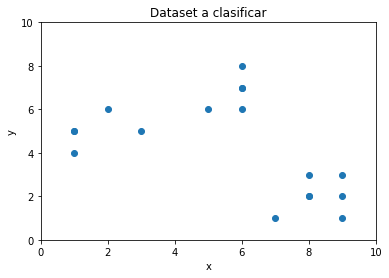

In [11]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, x2) #El x1 es el eje X y el x2 es el eje y
plt.show()

In [26]:
max_k = 10 ##máximo número de clusters que vamos a crear
K = range(1,max_k)
color_palette = [plt.cm.nipy_spectral(float(i)/max_k) for i in K]
print(color_palette[:])
print(color_palette[0])

[(0.5306882352941177, 0.0, 0.5973843137254902, 1.0), (0.0, 0.0, 0.8667, 1.0), (0.0, 0.5947725490196079, 0.8667, 1.0), (0.0, 0.6667, 0.5333, 1.0), (0.0, 0.7385313725490196, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.9359156862745098, 0.9280725490196079, 0.0, 1.0), (1.0, 0.6, 0.0, 1.0), (0.8640843137254902, 0.0, 0.0, 1.0)]
(0.5306882352941177, 0.0, 0.5973843137254902, 1.0)


In [27]:
centroid = [sum(X)/len(X) for i in K]
print(centroid)

[array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765]), array([5.58823529, 4.29411765])]


In [14]:
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis=1))
print(sst)

58.78095505364269


In [29]:
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    print(kmeanModel), print(labels)
print(centers)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
KMeans(n_clusters=2)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1]
KMeans(n_clusters=3)
[0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1]
KMeans(n_clusters=4)
[1 3 3 1 3 2 2 2 2 2 0 0 0 0 0 0 0]
KMeans(n_clusters=5)
[1 4 4 1 4 2 2 2 2 2 3 3 3 3 0 0 0]
KMeans(n_clusters=6)
[0 3 3 0 3 2 2 2 2 2 4 5 5 5 1 5 1]
KMeans(n_clusters=7)
[5 2 2 5 2 4 1 4 1 4 0 3 6 3 3 6 3]
KMeans()
[6 2 2 7 2 0 3 0 3 0 5 5 4 5 1 4 1]
KMeans(n_clusters=9)
[4 1 1 7 1 0 3 0 3 0 8 2 6 2 5 6 5]
     0         1
0  6.0  7.333333
1  1.0  4.666667
2  8.0  2.000000
3  5.5  6.000000
4  3.0  5.000000
5  8.5  3.000000
6  9.0  1.500000
7  2.0  6.000000
8  7.0  1.000000


In [30]:
print(labels)

[4 1 1 7 1 0 3 0 3 0 8 2 6 2 5 6 5]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


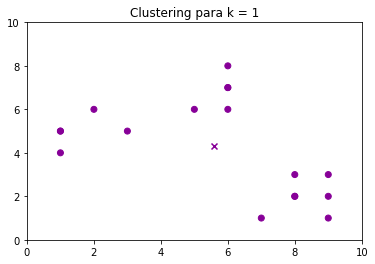

* Para k =  2  el promedio de la silueta es de:  0.6113424368705715
  - Para i=  1  la silueta del cluster vale:  0.7746251901389686
  - Para i=  2  la silueta del cluster vale:  0.49704450958269375


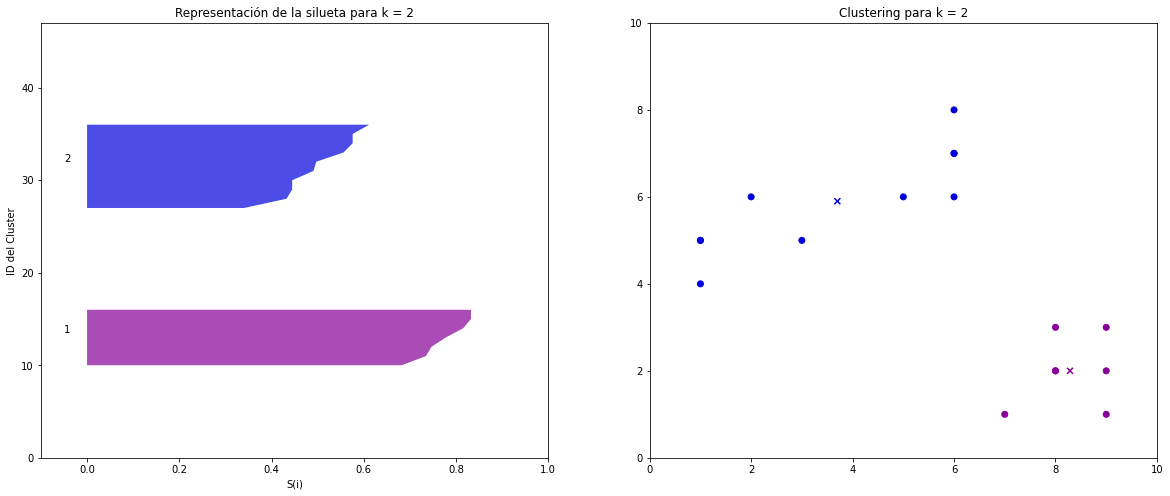

* Para k =  3  el promedio de la silueta es de:  0.7122079383287169
  - Para i=  1  la silueta del cluster vale:  0.6609508863896014
  - Para i=  2  la silueta del cluster vale:  0.7345257364682265
  - Para i=  3  la silueta del cluster vale:  0.7322200728725188


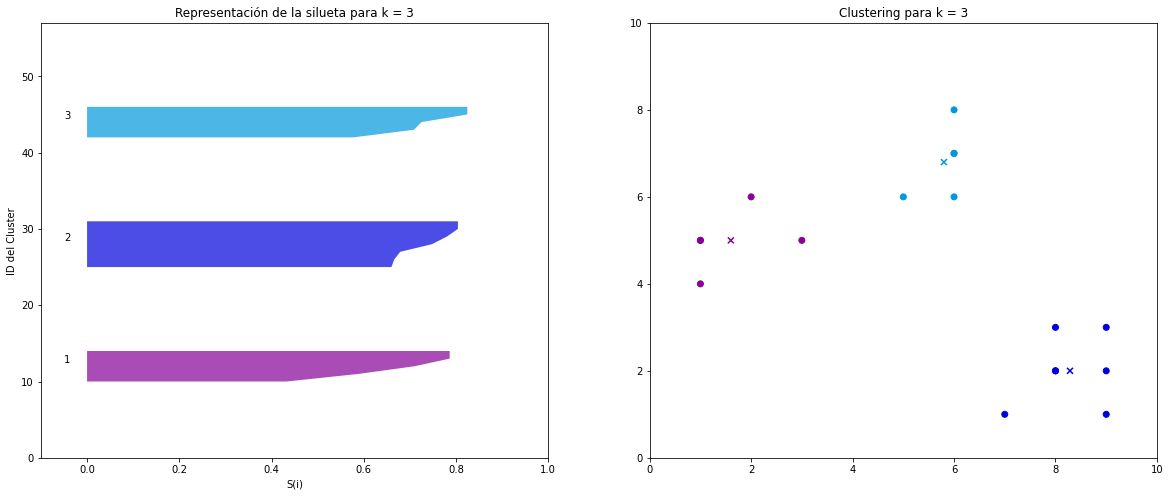

* Para k =  4  el promedio de la silueta es de:  0.6389948643127632
  - Para i=  1  la silueta del cluster vale:  0.654458796162702
  - Para i=  2  la silueta del cluster vale:  0.7345257364682265
  - Para i=  3  la silueta del cluster vale:  0.655666655624379
  - Para i=  4  la silueta del cluster vale:  0.24096929517637128


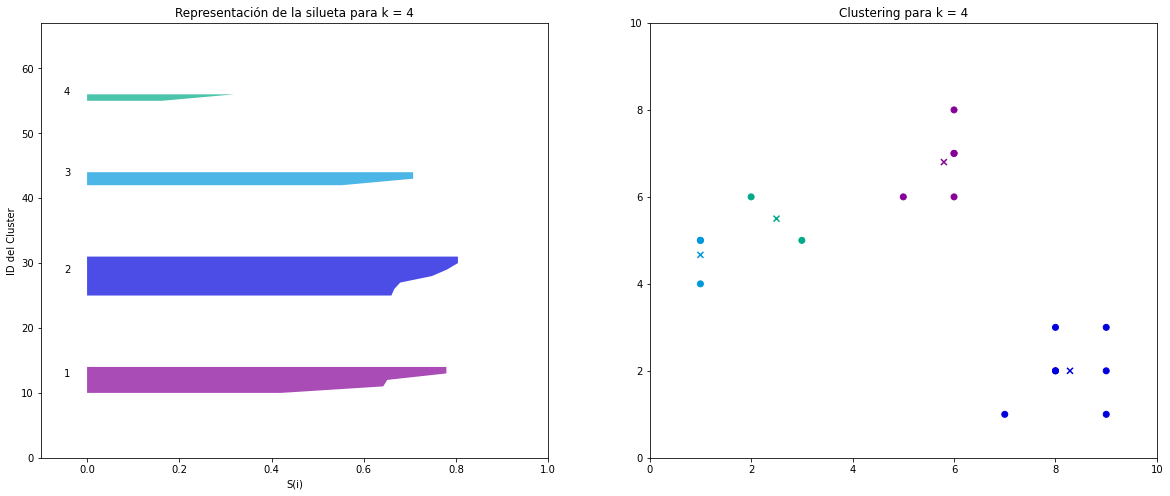

* Para k =  5  el promedio de la silueta es de:  0.42883912423017356
  - Para i=  1  la silueta del cluster vale:  0.1899052168375926
  - Para i=  2  la silueta del cluster vale:  0.654458796162702
  - Para i=  3  la silueta del cluster vale:  0.655666655624379
  - Para i=  4  la silueta del cluster vale:  0.2698039021743969
  - Para i=  5  la silueta del cluster vale:  0.24096929517637128


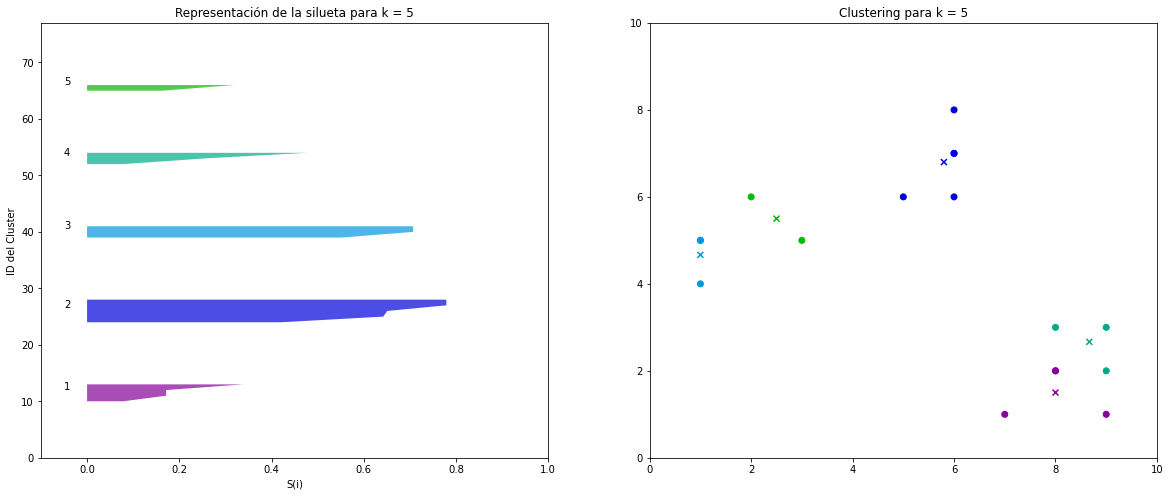

* Para k =  6  el promedio de la silueta es de:  0.37500287671219246
  - Para i=  1  la silueta del cluster vale:  0.2698039021743969
  - Para i=  2  la silueta del cluster vale:  0.24096929517637128
  - Para i=  3  la silueta del cluster vale:  0.5664789734180768
  - Para i=  4  la silueta del cluster vale:  0.1899052168375926
  - Para i=  5  la silueta del cluster vale:  0.655666655624379
  - Para i=  6  la silueta del cluster vale:  0.32882042637679976


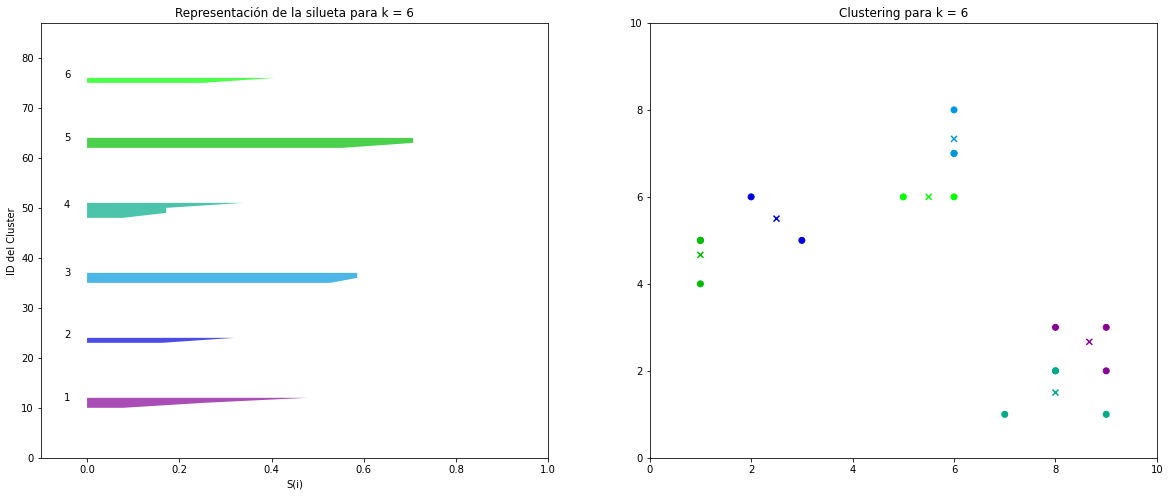

* Para k =  7  el promedio de la silueta es de:  0.37055812537654054
  - Para i=  1  la silueta del cluster vale:  0.655666655624379
  - Para i=  2  la silueta del cluster vale:  0.14773975649110374
  - Para i=  3  la silueta del cluster vale:  0.5664789734180768
  - Para i=  4  la silueta del cluster vale:  0.0
  - Para i=  5  la silueta del cluster vale:  0.350084177231389
  - Para i=  6  la silueta del cluster vale:  0.24096929517637128
  - Para i=  7  la silueta del cluster vale:  0.32882042637679976


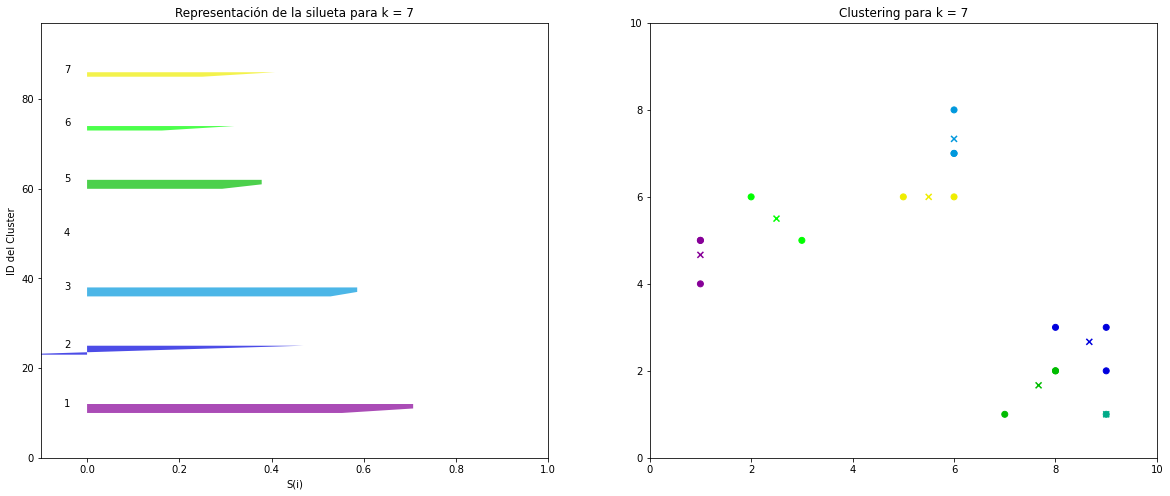

* Para k =  8  el promedio de la silueta es de:  0.37560176813183055
  - Para i=  1  la silueta del cluster vale:  0.24096929517637128
  - Para i=  2  la silueta del cluster vale:  0.20382042637679978
  - Para i=  3  la silueta del cluster vale:  0.5664789734180768
  - Para i=  4  la silueta del cluster vale:  0.655666655624379
  - Para i=  5  la silueta del cluster vale:  0.39052429175126996
  - Para i=  6  la silueta del cluster vale:  0.0
  - Para i=  7  la silueta del cluster vale:  0.32882042637679976
  - Para i=  8  la silueta del cluster vale:  0.0


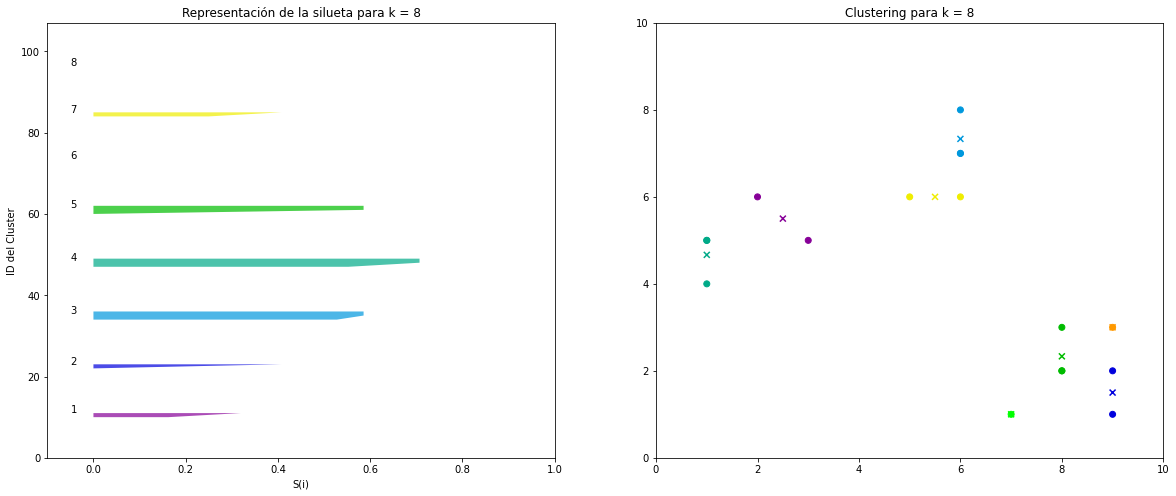

* Para k =  9  el promedio de la silueta es de:  0.34011594848992555
  - Para i=  1  la silueta del cluster vale:  0.6152265411044983
  - Para i=  2  la silueta del cluster vale:  0.20382042637679978
  - Para i=  3  la silueta del cluster vale:  0.32882042637679976
  - Para i=  4  la silueta del cluster vale:  0.39052429175126996
  - Para i=  5  la silueta del cluster vale:  0.0
  - Para i=  6  la silueta del cluster vale:  0.5664789734180768
  - Para i=  7  la silueta del cluster vale:  0.0
  - Para i=  8  la silueta del cluster vale:  0.0
  - Para i=  9  la silueta del cluster vale:  0.0


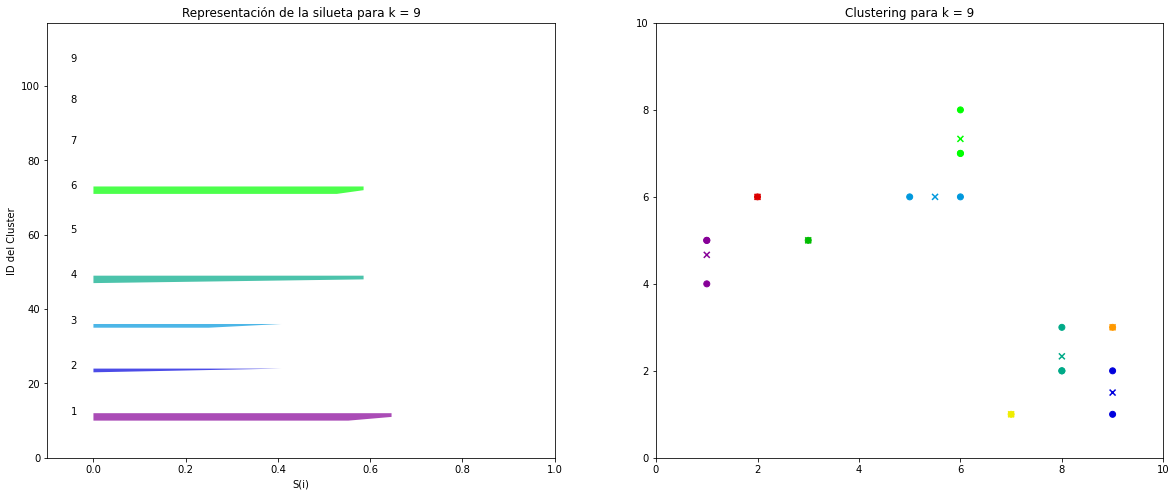

In [32]:
max_k = 10 ##máximo número de clusters que vamos a crear
K = range(1,max_k)
ssw = [] ## Suma de los cuadrados internos
color_palette = [plt.cm.nipy_spectral(float(i)/max_k) for i in K]#Color Manager
centroid = [sum(X)/len(X) for i in K] #El centroide de siempre replicado tantas veces como K
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis=1))#Calcula la distancia entre 
#cada uno de los puntos del data set y el centroide por filas, axis = 1.
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_ #Habrá tantos labels como puntos en el df.
    #Entonces cada punto tendrá un color, este es el array de colores pra cada punto.
   
    #Medir la distancia cada elemento a varicentro
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis=1)) 
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in labels]
    #Labels son las etiquetas de los clústers, por ende, funciona como el 
    #índice dentro del array de paleta de colores color_palette
    
    ##Fabricaremos una silueta para cada cluster
    ## Por seguridad, no hacemos silueta si k=1 o k=len(X)
    if 1<k<len(X):
        ##Crear un sublot de una fila y dos columnas
        ##Silueta de un lado y segmentación del cluster por otro
        fig, (axis1, axis2) = plt.subplots(1,2)#Filas y columnas
        fig.set_size_inches(20,8)#Tamaño del plor golbal
        
        #El primer subplot contendrá la silueta, que puede tener valores desde  -1 a 1
        #En nuestro caso, ya controlamos que los valores están entre -0.1 y 1
        axis1.set_xlim([-0.1,1.0])
        #El número de clusters a insertar determinará el tamaño de cada barra
        #El coeficiente de (n_clusters+1)*10 será el espacio en blanco que dejaremos
        #entre siluetas individuales de cada cluster para separarlas.
        sep = 10  #10 es el factor de separación
        axis1.set_ylim([0, len(X)+(k+1)*sep])
        
        silhouette_avg = silhouette_score(X, labels)#Coeficiente de silueta
        #Recordar que los labels van cambiando por cada K, van naciendo
        #nuevos clusters y por ende nuevos labels y nuevos socres.
        #La función score no funciona para K=1 o k=len(X)
        print("* Para k = ", k, " el promedio de la silueta es de: ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X,labels) #Calucla las siluetas,
        #OJO, calcula por cada vez que k avanza las siluetas que se forman, MUY IMPORTANTE
        y_lower = sep
        for i in range(k): #Este for va a ir incrementandosé en cantidad
            #cada vez que k incremente en uno. O sea que va a ejecutarse
            #tantas veces como clústers se vayan creando por iteración.
            
            #Agregamos la silueta del cluster i-ésimo
            ith_cluster_sv = sample_silhouette_values[labels == i] 
            #Labels: array de índices que indica qué elementos del dataset corresponden
            #a cada clúster, se modifica por el for anterior, que es el que se incrementa
            #cada vez que k aumenta, y el for de i recorre rango de k entonces
            #para cada valor de label que sea igual a i tenemos un clúster.
            
            print("  - Para i= ", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            #Ordenamos descendientemente las siluetas del cluster i-ésimo.
            ith_cluster_sv.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0] #N° filas del cluster
            y_upper = y_lower + ith_cluster_size #Irá cambiando por cada cluster
            
            #Elegimos el color del cluster
            color = color_palette[i]
            
            #Construimos las figuras, con el rango y_lower e y_upper,
            #luego con las yies desde 0 hasta ith_cluster_sv, el color
            #i-ésimo y finalmente una transparencia de alpha = 0.7
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            
            #Etiquetamos dicho cluster con el número en el centro,
            #los primeros tres parámetros antes de str son para ajustar el texto  
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del gráfico
            y_lower = y_upper + sep #dejamos vacías 10 posiciones sin muestra
        
        axis1.set_title("Representación de la silueta para k = %s" %str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##Fin de la representación de la silueta
        
    ##Plot de los k-means con los puntos respectivos.
    ## Recordar que seguimos dentro del for principal para cada k
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s" %str(k))
    plt.scatter(x1, x2, c=label_color)
    #Pintamos los varicentros con centers[0] para las X y centers[1] para las Y
    plt.scatter(centers[0], centers[1], c=color_palette[0:k], marker = "x")
    plt.show()

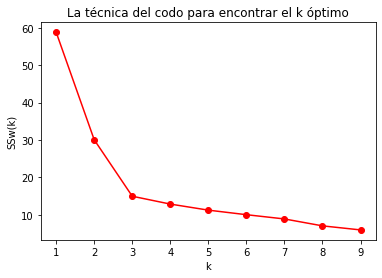

In [68]:
#Representación del codo
plt.plot(K, ssw, "ro-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

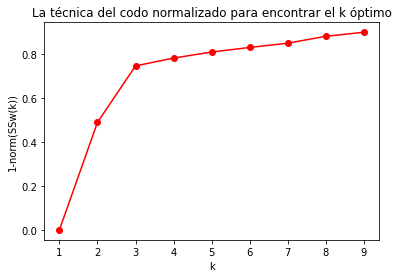

In [67]:
#Representación del codo normalizado
plt.plot(K, 1-ssw/sst, "ro-")
plt.xlabel("k")
plt.ylabel("1-norm(SSw(k))")
plt.title("La técnica del codo normalizado para encontrar el k óptimo")
plt.show()

El k óptimo es igual a 3, donde el clústering deja de ser súper creciente para achatarse y pasar a crecer paulatinamente.